# CIS 678 - Machine Learning - Kaggle Challenge 3: MNIST Digit Classification

<!-- ## Data Loading -->

<!-- ## Model Implementation -->

<!-- ## Model Evaluation -->

<!-- ## Conclusion -->

## Notebook Configuration
Before running our model, let's change our working directory over to our Python scripts by running the following shell script:

In [1]:
!echo sourcing MNIST model directory...
%cd '../model/src/'

sourcing MNIST model directory...
/Users/jppalacios/academic/fall2023/cis678/ml-challenge-3/model/src


## Importing our Custom Neural Network Libraries
Now that were are under the right directory, let's start off by importing all of our custom Python scripts.

In [2]:
import numpy as np

# custom modules
from toolkit import Toolkit, logging_levels
from parameters import ParameterManager
from model import Model

# creating our notebook toolkit helper
tools = Toolkit()
tools.configure(name = 'Notebook', level = logging_levels['DEBUG'])

Notebook - DEBUG - ready to report messages


## Load in Data
This model will train on the MNIST data set.
A collection of three `csv` files are imported to generate our training and testing data sets.
Let's load in our `mnist_train.csv`, `mnist_train_targets.csv`, and `mnist_test.csv` files.


Notebook - INFO - loading in our MNIST data sets
Notebook - INFO - applying normalization to our train data
Notebook - INFO - visualizing a few MNIST training samples...


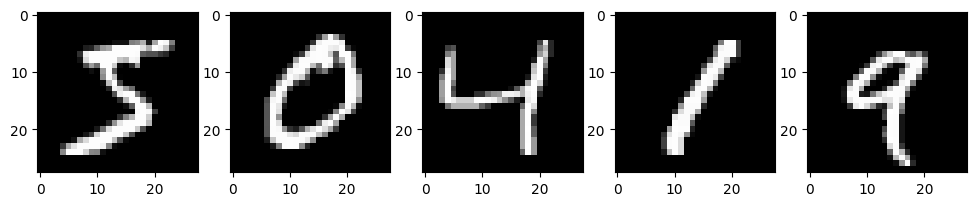

Notebook - WARNING - plots should be labaled!


In [3]:
tools.info("loading in our MNIST data sets")

train_data    = tools.load_data("../data/train/mnist_train.csv")
train_targets = tools.load_data("../data/train/mnist_train_targets.csv", transpose = False)
test_data     = tools.load_data("../data/test/mnist_test.csv")
test_targets  = np.zeros((test_data.shape[0], 1), dtype=int)

tools.info("applying normalization to our train data")

train_data = tools.normalize(train_data)
# test_data  = tools.normalize(test_data)

tools.info("visualizing a few MNIST training samples...")
tools.visualize(train_data)

tools.warning("plots should be labaled!")

# tools.info("visualizing a few MNIST testing samples...")
# tools.visualize(test_data)

## Parameter Configuration
Parameter selection is model development makes it easier to optimize our model.
For example, if we can tune our model's learning rate value and see its effects on model performance.
Using our custom `ParameterManager` class, we can easily create a variety of parameters to pass onto our MNIST model.

In [4]:

#> hyper-parameters
parameters = ParameterManager()

parameters.add_parameter('preprocessing', ['normalize'])
test = parameters.create_architecture({
    'layers':[4, 5]},{
    'dimension': [64, 32, 16]},{
    'activation': ['relu', 'sigmood']}
    )
parameters.add_parameter('architectures', test)

parameters.add_parameter('epochs', [1000])
parameters.add_parameter('learning rates', [0.01])
parameters.add_parameter('optimizer', ['adam'])

tools.debug(f'showing notebook parameters: {parameters}')

Notebook - DEBUG - showing notebook parameters: 
	test case 0: ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('relu', 'relu', 'softmax')], 1000, 0.01, 'adam')
	test case 1: ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('relu', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
	test case 2: ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('sigmoid', 'relu', 'softmax')], 1000, 0.01, 'adam')
	test case 3: ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('sigmoid', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
	test case 4: ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'relu', 'relu', 'softmax')], 1000, 0.01, 'adam')
	test case 5: ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'relu', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
	test case 6: ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'sigmoid', 'relu', 'softmax')], 1000, 0.01, 'adam')
	test case 7: ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)],

## MNIST Model Configuration and Compilation
With our training and testing data sets ready for processing and all of our tunable parameters declared, we can start compiling our custom neural architecture.

In [5]:
mnist_model = Model()

# todo: figure out a way to parametarize neural architecture

mnist_model.configure(
  parameters   = parameters.all(),
  debug_mode   = False
)

mnist_model.add_input_layer(784, 784, 'none')
mnist_model.summary()
mnist_model.add_hidden_layer(784, 64, 'relu')
mnist_model.summary()
mnist_model.add_hidden_layer(64, 32, 'sigmoid')
mnist_model.summary()
mnist_model.add_output_layer(32, 10, 'softmax')
mnist_model.summary()

mnist_model.fit(train_data, train_targets, epochs = 10, learning_rate = 0.01)

MNIST Model - INFO - ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('relu', 'relu', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('relu', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('sigmoid', 'relu', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [2, [(784, 64), (64, 32), (32, 10)], ('sigmoid', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'relu', 'relu', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'relu', 'sigmoid', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16, 10)], ('relu', 'sigmoid', 'relu', 'softmax')], 1000, 0.01, 'adam')
MNIST Model - INFO - ('normalize', [3, [(784, 64), (64, 32), (32, 16), (16

## Assessing Model Performance
The following section describes our model performance over all parameter variations

In [6]:
scores = mnist_model.evaluate(test_data, test_targets)

tools.info("saving our test targets")

tools.save_data("../data/test/mnist_test_targets.csv", test_targets)

Notebook - INFO - saving our test targets
